# **Section1 Project**
### "다음 분기에 어떤 게임을 설계해야 할까?"










#1.지역에 따라서 선호하는 게임 장르가 다를까?


   

In [1]:
## Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
## 파일 업로드
from google.colab import files  
files.upload()

Saving vgames2.csv to vgames2 (3).csv


{'vgames2.csv': b'"","Name","Platform","Year","Genre","Publisher","NA_Sales","EU_Sales","JP_Sales","Other_Sales"\n"1","Candace Kane\'s Candy Factory","DS","2008","Action","Destineer","0.04","0","0","0"\n"2","The Munchables","Wii","2009","Action","Namco Bandai Games","0.17","0","0","0.01"\n"3","Otome wa Oanesama Boku ni Koi Shiteru Portable","PSP","2010","Adventure","Alchemist","0","0","0.02","0"\n"4","Deal or No Deal: Special Edition","DS","2010","Misc","Zoo Games","0.04","0","0","0"\n"5","Ben 10 Ultimate Alien: Cosmic Destruction","PS3","2010","Platform","D3Publisher","0.12","0.09","0","0.04"\n"6","Power Pro Kun Pocket 8","DS","2005","Sports","Konami Digital Entertainment","0","0","0.14","0"\n"7","JASF: Jane\'s Advanced Strike Fighters","PC","2011","Simulation","Deep Silver","0.02","0.01","0","0"\n"8","Samurai Warriors: State of War","PSP","2005","Action","Tecmo Koei","0.07","0","0.11","0.01"\n"9","Imabikisou","PS3","2007","Adventure","Sega","0","0","0.04","0"\n"10","The Penguins of M

In [3]:
## 데이터셋 불러오기
df = pd.read_csv('vgames2.csv')
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03




---

*   **Name** : 게임의 이름
*   **Platform** : 게임이 지원되는 플랫폼의 이름
*   **Year** : 게임이 출시된 연도
*   **Genre** : 게임의 장르
*   **Publisher** : 게임을 제작한 회사
*   **NA_Sales** : 북미지역에서의 출고량
*   **EU_Sales** : 유럽지역에서의 출고량
*   **JP_Sales** : 일본지역에서의 출고량
*   **Other_Sales** : 기타지역에서의 출고량

---



In [4]:
## 결측치 확인
df.isnull().sum()

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [5]:
## 결측치 제거
df = df.dropna()
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [6]:
## 중복되는 데이터 확인
df.duplicated().sum()

0

In [7]:
#Genre에 몇가지 데이터가 있는지 확인
df.Genre.value_counts()

Action          3240
Sports          2299
Misc            1681
Role-Playing    1465
Shooter         1280
Adventure       1268
Racing          1219
Platform         873
Simulation       846
Fighting         835
Strategy         669
Puzzle           566
Name: Genre, dtype: int64

In [8]:
## 각 컬럼별 데이터타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16241 non-null  int64  
 1   Name         16241 non-null  object 
 2   Platform     16241 non-null  object 
 3   Year         16241 non-null  float64
 4   Genre        16241 non-null  object 
 5   Publisher    16241 non-null  object 
 6   NA_Sales     16241 non-null  object 
 7   EU_Sales     16241 non-null  object 
 8   JP_Sales     16241 non-null  object 
 9   Other_Sales  16241 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.4+ MB


In [9]:
## 출고량 데이터의 K,M단위를 숫자로 변경

df['NA_Sales'] = df.NA_Sales.str.translate(str.maketrans({'K':'000','M':'000000'}))
df['EU_Sales'] = df.EU_Sales.str.translate(str.maketrans({'K':'000','M':'000000'}))
df['JP_Sales'] = df.JP_Sales.str.translate(str.maketrans({'K':'000','M':'000000'}))
df['Other_Sales'] = df.Other_Sales.str.translate(str.maketrans({'K':'000','M':'000000'}))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [10]:
## 출고량 데이터타입을 float로 변경
df = df.astype({'NA_Sales':float})
df = df.astype({'EU_Sales':float})
df = df.astype({'JP_Sales':float})
df = df.astype({'Other_Sales':float})

In [11]:
## 장르별 각 북미지역의 출고량의 평균
df_NA = df.groupby("Genre")['NA_Sales'].mean()

## 시리즈타입을 데이터프레임으로 변환
df_NA = pd.DataFrame(df_NA, columns=['NA_Sales'])
df_NA

,NA_Sales
Genre,
Action,2170.015963
Adventure,213.013817
Fighting,970.322802
Misc,2236.996413
Platform,3792.029863
Puzzle,123.889594
Racing,4503.978023
Role-Playing,826.155324
Shooter,2070.759242


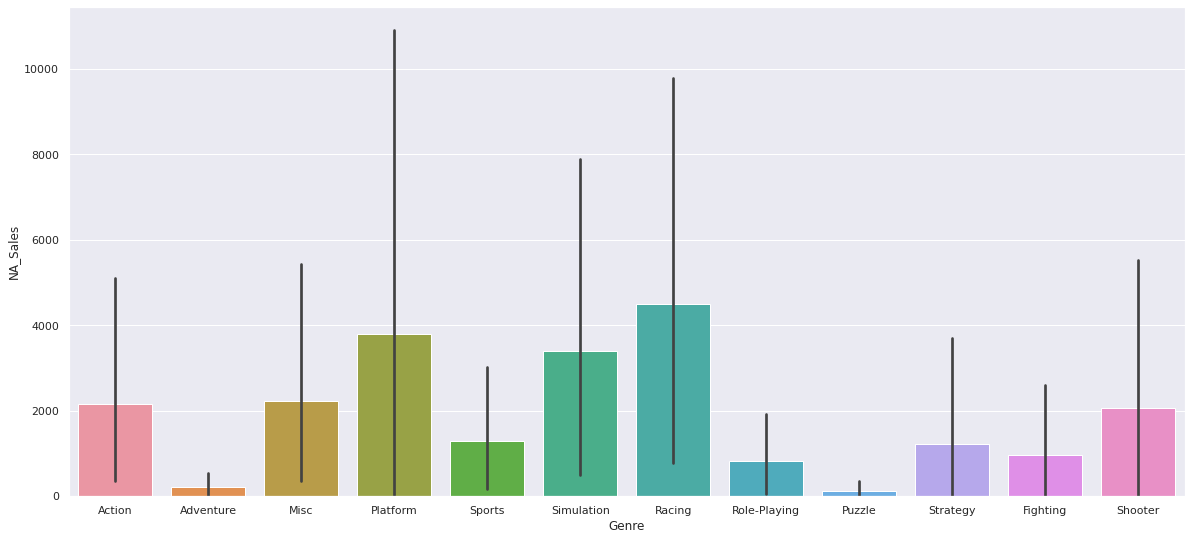

In [42]:
## 1.북미지역 장르별 출고량 시각화
sns.barplot(
    data= df,
    x= "Genre",
    y= "NA_Sales"
)
sns.set(rc={'figure.figsize':(20,9)})
plt.show()

In [13]:
## 장르별 각 유럽지역의 출고량의 평균
df_EU = df.groupby("Genre")['EU_Sales'].mean()

## 시리즈타입을 데이터프레임으로 변환
df_EU = pd.DataFrame(df_EU, columns=['EU_Sales'])
df_EU

,EU_Sales
Genre,
Action,1302.626364
Adventure,110.460189
Fighting,1664.788635
Misc,1273.174307
Platform,1477.891569
Puzzle,88.428304
Racing,517.009344
Role-Playing,20.602771
Shooter,2609.614758


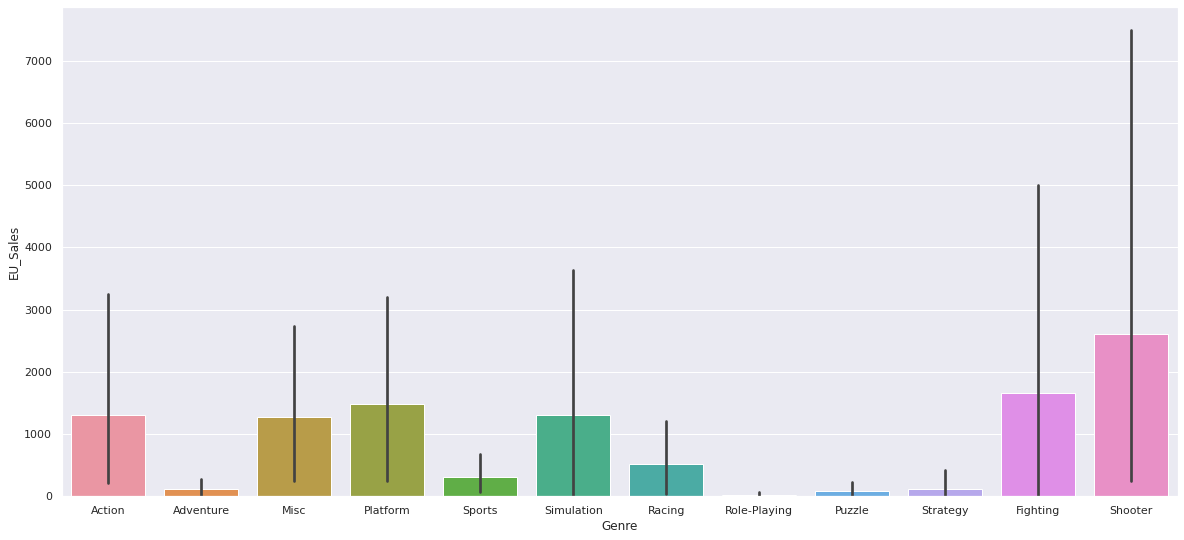

In [14]:
## 2.유럽지역 장르별 출고량 시각화
sns.barplot(
    data= df,
    x= "Genre",
    y= "EU_Sales"
)
sns.set(rc={'figure.figsize':(20,9)})
plt.show()

In [15]:
## 장르별 각 일본지역의 출고량의 평균
df_JP = df.groupby("Genre")['JP_Sales'].mean()

## 시리즈타입을 데이터프레임으로 변환
df_JP = pd.DataFrame(df_JP, columns=['JP_Sales'])
df_JP

,JP_Sales
Genre,
Action,361.159083
Adventure,47.359472
Fighting,215.673006
Misc,136.885158
Platform,240.699107
Puzzle,0.099364
Racing,213.335570
Role-Playing,2614.565939
Shooter,31.279797


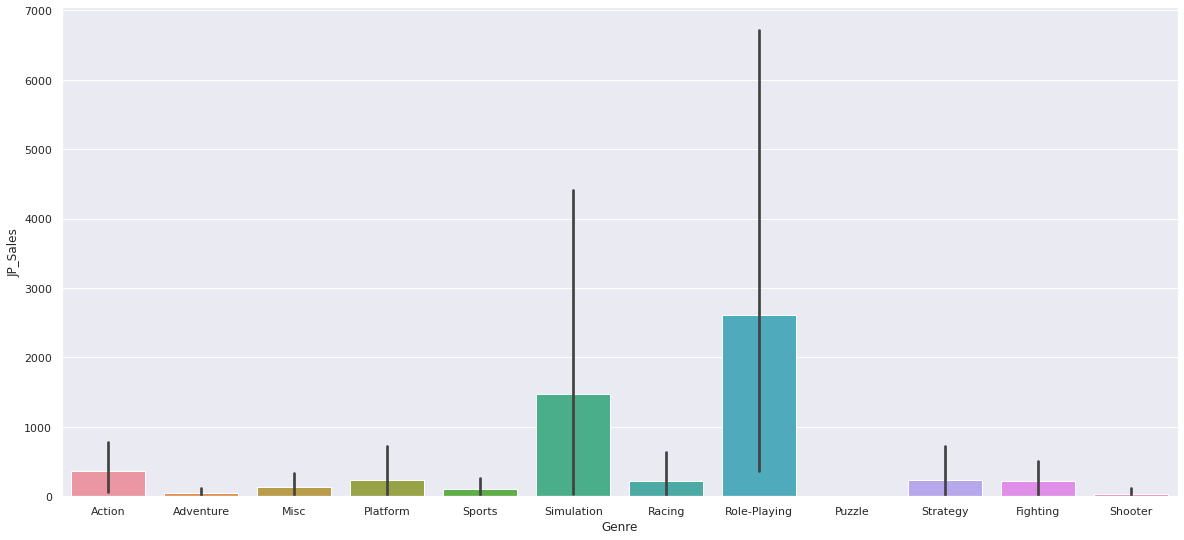

In [16]:
## 3.일본지역 장르별 출고량 시각화
sns.barplot(
    data= df,
    x= "Genre",
    y= "JP_Sales"
)
sns.set(rc={'figure.figsize':(20,9)})
plt.show()

In [17]:
## 장르별 각 기타지역의 출고량의 평균
df_Other = df.groupby("Genre")['Other_Sales'].mean()

## 시리즈타입을 데이터프레임으로 변환
df_Other = pd.DataFrame(df_Other, columns=['Other_Sales'])
df_Other

,Other_Sales
Genre,
Action,280.920704
Adventure,63.104590
Fighting,167.707796
Misc,77.378055
Platform,389.520172
Puzzle,0.021979
Racing,278.979631
Role-Playing,498.331741
Shooter,265.704313


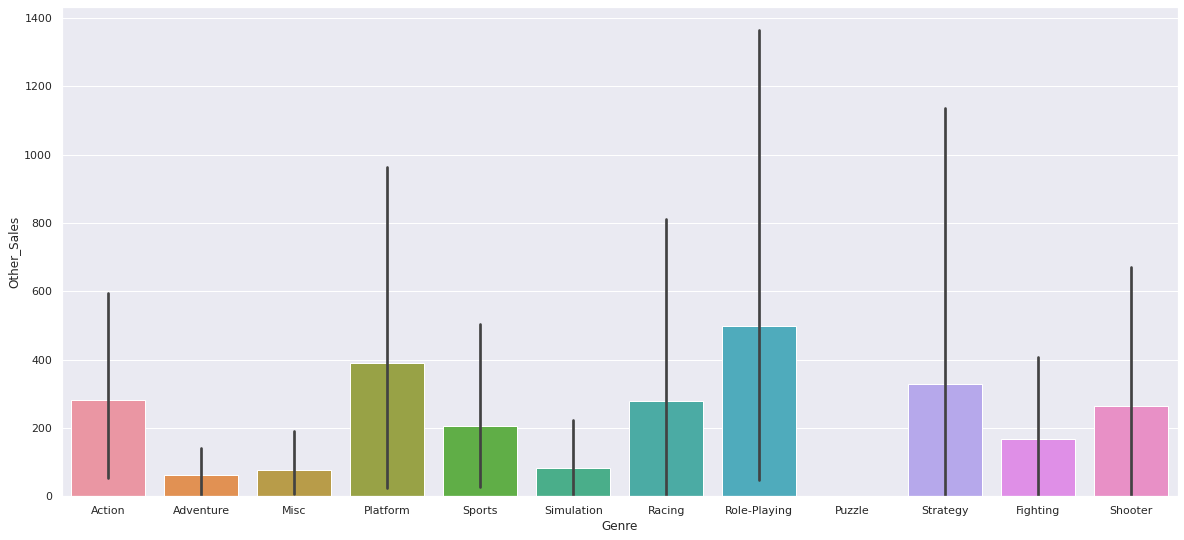

In [18]:
## 4.기타지역 장르별 출고량 시각화
sns.barplot(
    data= df,
    x= "Genre",
    y= "Other_Sales"
)
sns.set(rc={'figure.figsize':(20,9)})
plt.show()

#2.연도별 게임의 트렌드가 있을까?


In [19]:
## 연도별 게임의 트렌드가 있을까? --> 연도별 어떤 게임이 가장 많이 팔렸을까?
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [20]:
## Yeat column의 데이터타입을 정수로 변환
df = df.astype({'Year':'int'})
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [21]:
## 연도데이터 종류와 갯수 확인
df.Year.value_counts()

2009    1418
2008    1413
2010    1246
2007    1192
2011    1123
        ... 
13         2
12         2
86         1
2020       1
94         1
Name: Year, Length: 62, dtype: int64

In [22]:
## Year 작은 크기의 값을 확인
df[df['Year'] <= 1500]

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
74,75,Age of Empires III: Complete Collection,PC,9,Strategy,Microsoft Game Studios,0.01,0.12,0.00,0.03
81,82,Treasures of the Deep,PS,97,Action,Namco Bandai Games,0.10,0.07,0.00,0.01
213,214,NASCAR Unleashed,PS3,11,Racing,Activision,0.09,0.00,0.00,0.01
304,305,Kung Fu Panda: Showdown of Legendary Legends,PS3,15,Action,Little Orbit,0.00,0.02,0.00,0.00
768,769,NASCAR Thunder 2004,PS2,3,Racing,Electronic Arts,0.53,0.41,0.00,0.14
...,...,...,...,...,...,...,...,...,...,...
15985,15986,Sugoi Hebereke,SNES,94,Fighting,Sunsoft,0.00,0.00,0.02,0.00
16103,16104,Fab 5 Soccer,DS,8,Sports,Destineer,0.01,0.00,0.00,0.00
16149,16150,Dragon Ball Z: Burst Limit,X360,8,Fighting,Atari,0.24,0.18,0.03,0.05
16394,16395,Point Blank 3,PS,0,Shooter,Namco Bandai Games,0.01,0.01,0.00,0.00


In [23]:
## 년도를 4자리수로 구성
old_year = {'Year' : {1:2001, 2:2002, 3:2003, 4:2004, 5:2005, 6:2006, 7:2007, 8:2008, 9:2009, 0:2000,
                      99:1999, 98:1998, 97:1997, 96:1996, 95:1995, 94:1994, 93:1993, 92:1992, 
                       10:2010, 11:2011, 12:2012, 13:2013, 14:2014, 15:2015, 16:2016, 17:2017, 18:2018, 19:2019, 20:2020, 21:2021, 22:2022, 86:1986}}
df = df.replace(old_year)
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [24]:
## 년도수 재확인 -- 이상한 데이터 없음
df[df['Year'] <= 1500]

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [25]:
## 전지역 출고량 합 -- feaure data생성
df['Sum_Sales'] = (df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales'])
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sum_Sales
0,1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16596,16597,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [26]:
## 연도별 가장 많이 팔린 게임
df_max = df.loc[df.groupby(['Year'])['Sum_Sales'].idxmax()]
df_max

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sum_Sales
5723,5724,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
5320,5321,E.T.: The Extra Terrestrial,2600,1981,Action,Atari,1.84,110000.00,0.00,0.02,110001.86
5820,5821,Pac-Man,2600,1982,Puzzle,Atari,7.28,0.45,0.00,0.08,7.81
466,467,Baseball,NES,1983,Sports,Nintendo,0.73,0.10,2.35,0.02,3.20
10488,10489,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
4199,4200,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
10791,10792,The Legend of Zelda,NES,1986,Action,Nintendo,3.74,0.93,1.69,0.14,6.50
9997,9998,Zelda II: The Adventure of Link,NES,1987,Adventure,Nintendo,2.19,0.50,1.61,0.08,4.38
7494,7495,Super Mario Bros. 2,NES,1988,Platform,Nintendo,5.39,1.18,0.70,190000.00,190007.27
6086,6087,Adventures of Lolo,NES,1989,Puzzle,HAL Laboratory,60000.00,0.00,0.00,0.00,60000.00


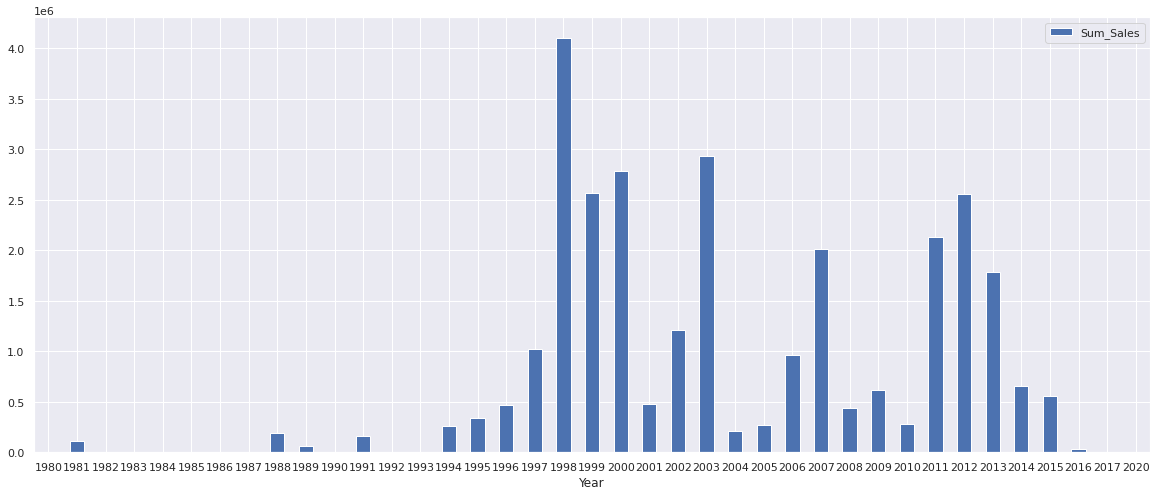

In [27]:
df_max.plot.bar(x="Year", y="Sum_Sales", rot=0, figsize=(20,8))

In [28]:
## 연도 별 가장 많이 팔린 게임들의 장르
df_max.Genre.value_counts()

Action          7
Shooter         5
Platform        5
Role-Playing    5
Simulation      4
Racing          4
Misc            3
Puzzle          2
Adventure       2
Sports          1
Fighting        1
Name: Genre, dtype: int64

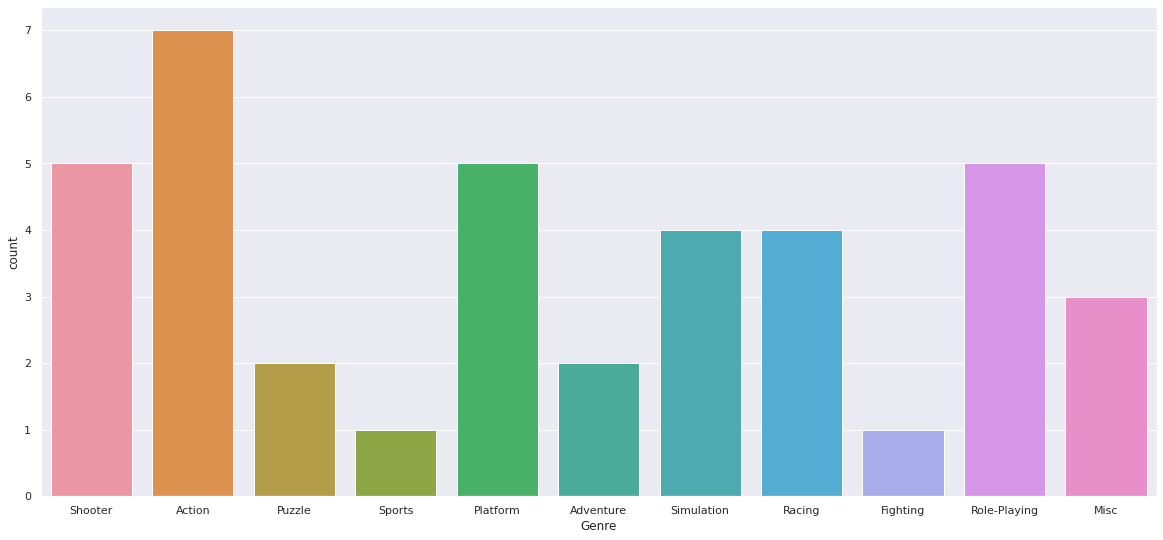

In [29]:
sns.countplot(x="Genre", data=df_max)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


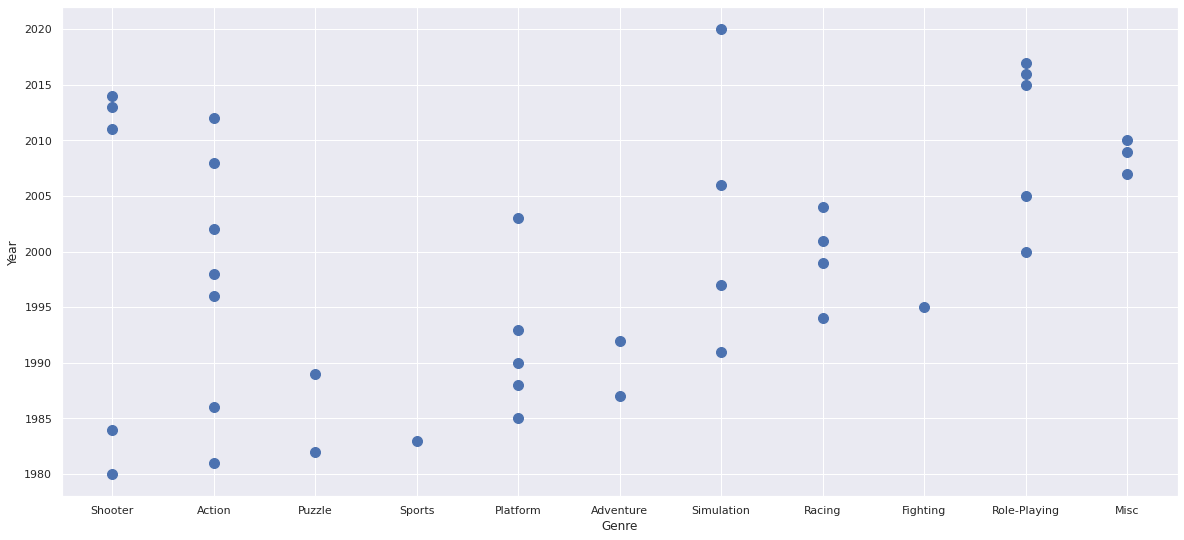

In [30]:
## 연도별 가장 많이 팔린 게임의 장르 분포 시각화
df_max.plot.scatter(x = 'Genre', y = 'Year', s = 100);

In [31]:
## 출고량 상위 1% 게임 추출
df_sort = df.sort_values('Sum_Sales',ascending=False)
df_1 = df_sort.head(160)
df_1

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sum_Sales
1964,1965,The Legend of Zelda: Ocarina of Time,N64,1998,Action,Nintendo,4100000.00,1.89,1.45,0.16,4100003.50
9829,9830,Super Mario Bros. 3,GBA,2003,Platform,Nintendo,2930000.00,1.25,0.83,0.20,2930002.28
3589,3590,Final Fantasy IX,PS,2000,Role-Playing,SquareSoft,1.62,0.77,2780000.00,0.14,2780002.53
13935,13936,Crash Team Racing,PS,1999,Racing,Sony Computer Entertainment,2570000.00,1.57,0.44,0.21,2570002.22
1629,1630,Assassin's Creed III,PS3,2012,Action,Ubisoft,2.64,2560000.00,0.16,1.14,2560003.94
...,...,...,...,...,...,...,...,...,...,...,...
5768,5769,Blazing Souls: Accelate,PSP,2009,Role-Playing,Idea Factory,40000.00,0.00,0.01,0.00,40000.01
14410,14411,World Poker Tour,PSP,2006,Misc,Take-Two Interactive,40000.00,0.00,0.00,0.00,40000.00
6309,6310,Thoroughbred Breeder II Plus,PS,1995,Simulation,Hect,0.00,0.00,40000.00,0.00,40000.00
9261,9262,Kikou Heidan J-Phoenix 2,PS2,2003,Action,Takara,0.00,0.00,40000.00,0.00,40000.00


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


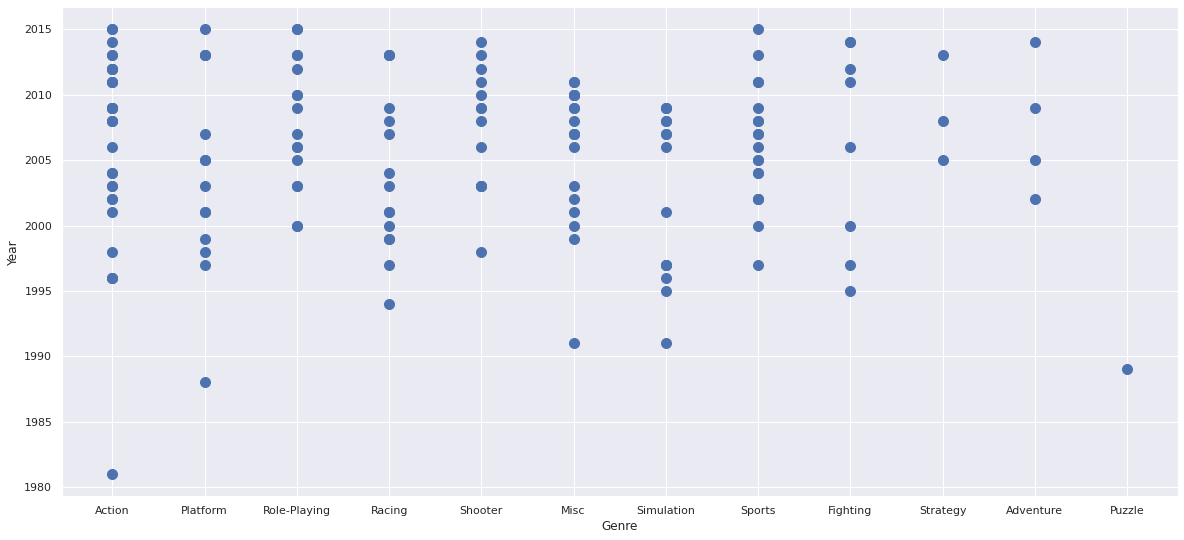

In [32]:
## 상위 1% 매출 게임의 연간 장르 분포 시각화
df_1.plot.scatter(x = 'Genre', y = 'Year', s = 100);

#3.출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [33]:
## 출고량 상위 1% 게임 추출
df_1

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sum_Sales
1964,1965,The Legend of Zelda: Ocarina of Time,N64,1998,Action,Nintendo,4100000.00,1.89,1.45,0.16,4100003.50
9829,9830,Super Mario Bros. 3,GBA,2003,Platform,Nintendo,2930000.00,1.25,0.83,0.20,2930002.28
3589,3590,Final Fantasy IX,PS,2000,Role-Playing,SquareSoft,1.62,0.77,2780000.00,0.14,2780002.53
13935,13936,Crash Team Racing,PS,1999,Racing,Sony Computer Entertainment,2570000.00,1.57,0.44,0.21,2570002.22
1629,1630,Assassin's Creed III,PS3,2012,Action,Ubisoft,2.64,2560000.00,0.16,1.14,2560003.94
...,...,...,...,...,...,...,...,...,...,...,...
5768,5769,Blazing Souls: Accelate,PSP,2009,Role-Playing,Idea Factory,40000.00,0.00,0.01,0.00,40000.01
14410,14411,World Poker Tour,PSP,2006,Misc,Take-Two Interactive,40000.00,0.00,0.00,0.00,40000.00
6309,6310,Thoroughbred Breeder II Plus,PS,1995,Simulation,Hect,0.00,0.00,40000.00,0.00,40000.00
9261,9262,Kikou Heidan J-Phoenix 2,PS2,2003,Action,Takara,0.00,0.00,40000.00,0.00,40000.00


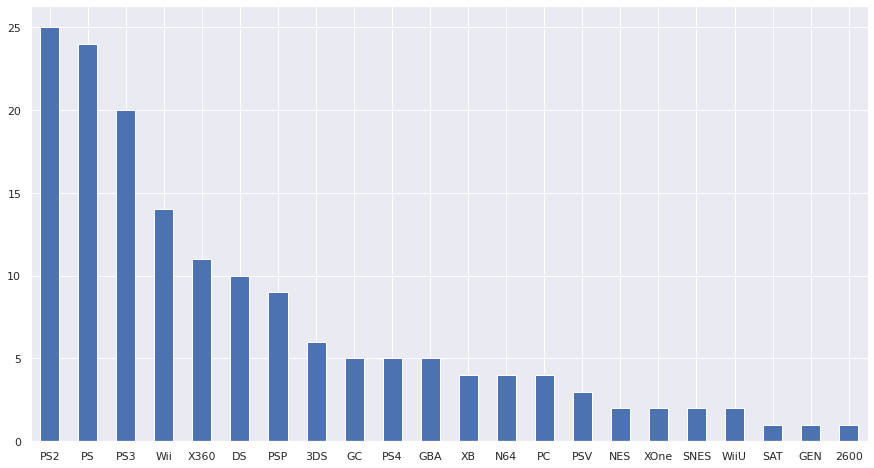

In [34]:
## 상위 160개 매출 게임이 사용하는 플랫폼 개수
df_1_plat = df_1.Platform.value_counts()
df_1_plat.plot.bar(x="Genre", y="Sum_Sales", rot=0, figsize=(15,8)) 

In [35]:
df_1_plat

PS2     25
PS      24
PS3     20
Wii     14
X360    11
DS      10
PSP      9
3DS      6
GC       5
PS4      5
GBA      5
XB       4
N64      4
PC       4
PSV      3
NES      2
XOne     2
SNES     2
WiiU     2
SAT      1
GEN      1
2600     1
Name: Platform, dtype: int64

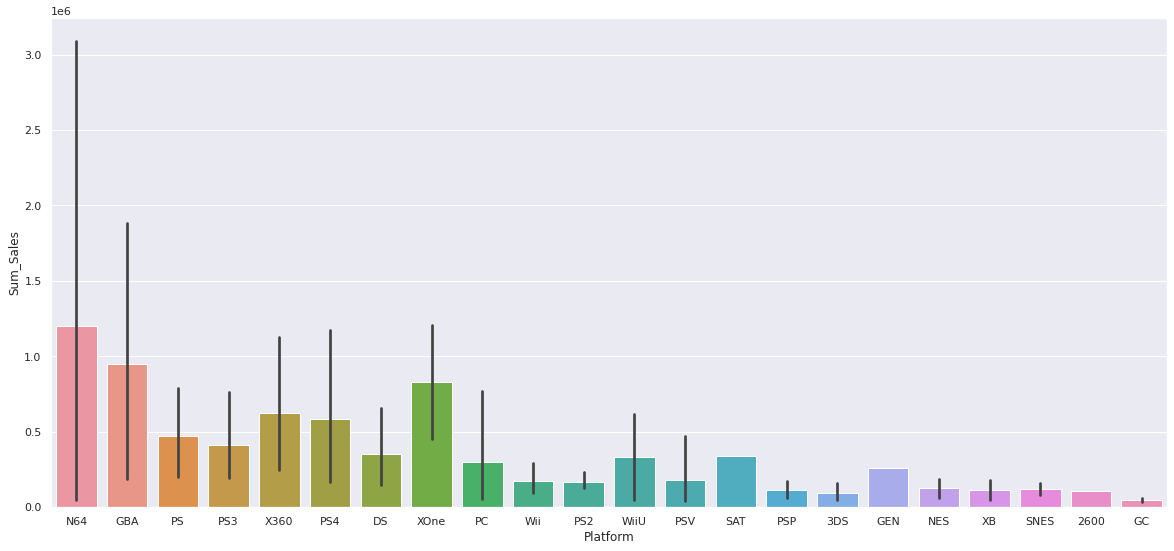

In [36]:
## 가장 많은 출고량을 기록했던 플랫폼

sns.barplot(
    data= df_1,
    x= "Platform",
    y= "Sum_Sales"
)
sns.set(rc={'figure.figsize':(20,9)})
plt.show()

In [37]:
## 가장 많이 이용하는 게임플랫폼 --> 시각화하기
df.Platform.value_counts()

DS      2127
PS2     2121
PS3     1299
Wii     1284
X360    1231
PSP     1193
PS      1185
PC       935
XB       799
GBA      784
GC       541
3DS      498
PSV      409
PS4      335
N64      313
SNES     239
XOne     212
SAT      173
WiiU     143
2600     115
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

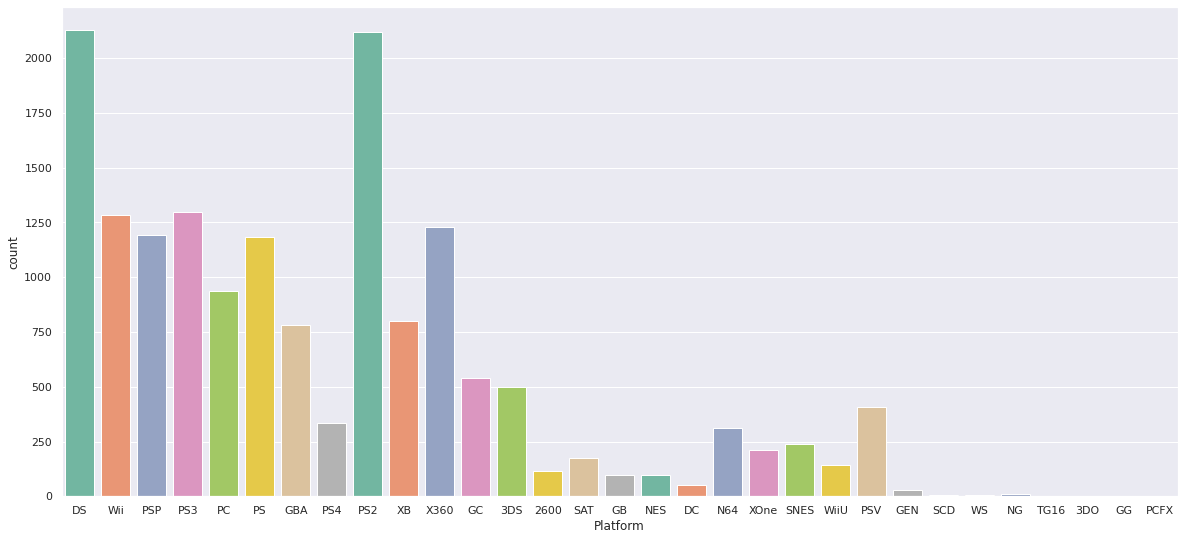

In [38]:
ax = sns.countplot(x="Platform", data=df, palette="Set2")

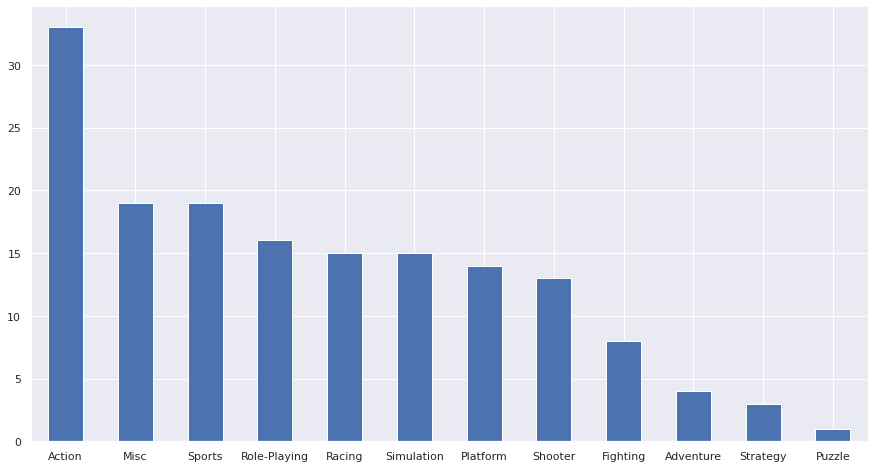

In [39]:
## 상위매출 게임의 장르 개수
df_1_Gen = df_1.Genre.value_counts()
df_1_Gen.plot.bar(x="Genre", y="Sum_Sales", rot=0, figsize=(15,8)) 

In [40]:
df_1_Gen

Action          33
Misc            19
Sports          19
Role-Playing    16
Racing          15
Simulation      15
Platform        14
Shooter         13
Fighting         8
Adventure        4
Strategy         3
Puzzle           1
Name: Genre, dtype: int64

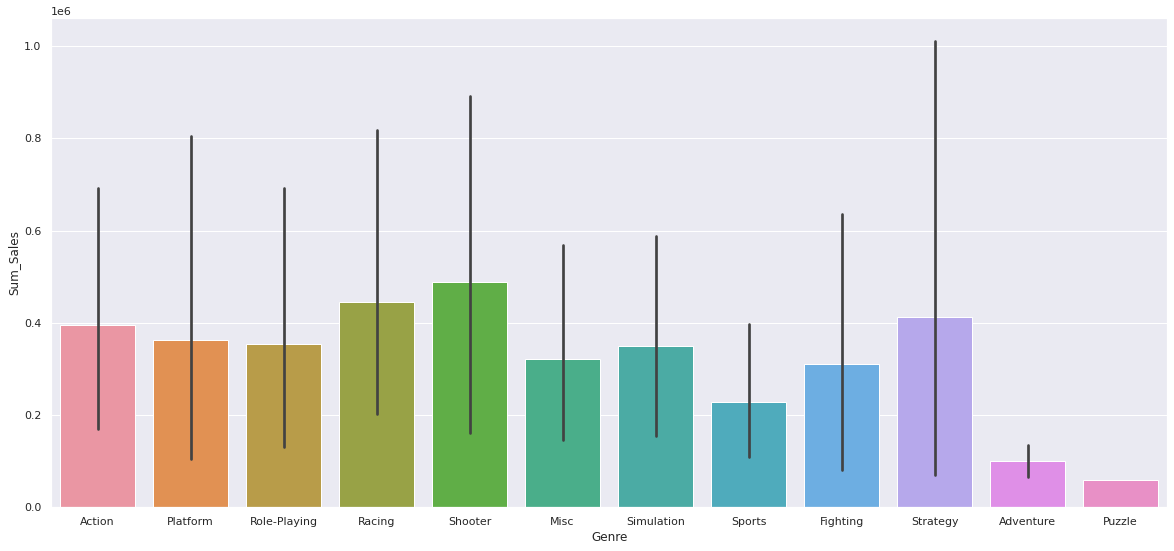

In [41]:
## 가장 많은 출고량을 기록했던 장르

sns.barplot(
    data= df_1,
    x= "Genre",
    y= "Sum_Sales"
)
sns.set(rc={'figure.figsize':(20,9)})
plt.show()

#4.어떤 게임을 설계해야할까?


## 1.많은 매출이 있었던 플랫폼 사용 and 꾸준히 사랑받은 액션이나 트렌드인 롤플레잉게임을 선택하는것은 좋다.




액션,롤플레잉 > 플랫폼,레이싱,슈팅,스포츠 > 퍼즐게임,어드벤처
